<a href="https://colab.research.google.com/github/mtareqsoliman/msthesis/blob/main/9CCM_10202022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+# Final Report



Importing Data:

In [1]:
import pandas as pd
import numpy as np
import math as math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.gridspec import GridSpec
import scipy.stats as sp
from scipy.optimize import minimize, LinearConstraint
import scipy.optimize as spo
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go



ecu_list = -np.random.lognormal(np.log(0.006),np.sqrt(np.log(1+0.35**2)),100)

mean = ln(0.006)
std dev = sqrt(ln(1+0.35**2))

mean = ln(

In [2]:

NLTHA100 = pd.read_excel('https://github.com/mtareqsoliman/msthesis/blob/main/Results/100NLTHA_FINAL.xlsx?raw=true')
ecu_100,Vult_100 = np.array(NLTHA100[['ecu']]),np.array(NLTHA100[['Vult']])

ecu_100_alpha = norm.cdf(np.log(-ecu_100), np.log(-ecu_100).mean(), np.log(-ecu_100).std())
Vult_100_alpha = norm.cdf(np.log(Vult_100), np.log(Vult_100).mean(), np.log(Vult_100).std())
ecu_100_alpha = norm.ppf(ecu_100_alpha,0,1)

Vult_100_alpha = norm.ppf(Vult_100_alpha,0,1)

NLTHA100.insert(2,'ecu_alpha',ecu_100_alpha)
NLTHA100.insert(3,'Vult_alpha',Vult_100_alpha)
NLTHA100.head(10)

,state,IM,ecu_alpha,Vult_alpha,record,ecu,Vult,Vbmax,ect,ecb,uindex,convergence
0,0,5,-2.813518,1.606817,RSN126_GAZLI_GAZ000,-0.0024,229.521449,61.769036,-0.000417,-0.000707,0,0
1,0,5,-2.813518,1.606817,RSN461_MORGAN_HVR240,-0.0024,229.521449,59.940031,-0.000410,-0.000683,0,0
2,0,5,-2.813518,1.606817,RSN518_PALMSPR_FVR045,-0.0024,229.521449,117.263469,-0.000838,-0.001389,0,0
3,0,5,-2.813518,1.606817,RSN599_WHITTIER.A_A-FLO020,-0.0024,229.521449,133.191829,-0.001051,-0.002344,0,0
4,0,5,-2.813518,1.606817,RSN721_SUPER.B_B-ICC090,-0.0024,229.521449,79.856953,-0.000524,-0.000925,0,0
5,0,5,-2.813518,1.606817,RSN766_LOMAP_G02000,-0.0024,229.521449,95.671368,-0.000634,-0.001110,0,0
6,0,5,-2.813518,1.606817,RSN828_CAPEMEND_PET000,-0.0024,229.521449,128.694410,-0.000968,-0.001746,0,0
7,0,5,-2.813518,1.606817,RSN864_LANDERS_JOS090,-0.0024,229.521449,64.391500,-0.000421,-0.000750,0,0
8,0,5,-2.813518,1.606817,RSN1044_NORTHR_NWH360,-0.0024,229.521449,94.186672,-0.000632,-0.001081,0,0
9,0,5,-2.813518,1.606817,RSN1148_KOCAELI_ARE000,-0.0024,229.521449,74.793036,-0.000476,-0.000863,0,0


In [3]:

NLTHA9 = pd.read_excel('https://github.com/mtareqsoliman/msthesis/blob/main/Results/9NLTHA_FINAL.xlsx?raw=true',index_col=0)
ecu_9,Vult_9 = np.array(NLTHA9[['ecu']]),np.array(NLTHA9[['Vult']])

ecu_9_alpha=NLTHA9['ecu_alpha']
Vult_9_alpha=NLTHA9['Vult_alpha']
NLTHA9.head(10)

,state,IM,record,ecu_alpha,Vult_alpha,ecu,Vult,Vbmax,ect,ecb,uindex,convergence
index,,,,,,,,,,,,
0,1,40,RSN126_GAZLI_GAZ000,-1.414214,0.000000,-0.003667,174.4819,142.824246,-0.058941,-0.112813,914,0
1,1,40,RSN126_GAZLI_GAZ000,-1.000000,-1.000000,-0.004356,137.1152,144.838821,-0.026165,-0.099632,906,FAILED
2,1,40,RSN126_GAZLI_GAZ000,-1.000000,1.000000,-0.004356,205.5083,144.838821,-0.026165,-0.099632,951,FAILED
3,1,40,RSN126_GAZLI_GAZ000,0.000000,-1.414214,-0.006019,121.6374,150.235062,-0.058990,-0.126897,855,0
4,1,40,RSN126_GAZLI_GAZ000,0.000000,0.000000,-0.006019,174.4819,150.235062,-0.058990,-0.126897,956,0
5,1,40,RSN126_GAZLI_GAZ000,0.000000,1.414214,-0.006019,218.3598,150.235062,-0.058990,-0.126897,956,0
6,1,40,RSN126_GAZLI_GAZ000,1.000000,-1.000000,-0.008243,137.1152,160.453794,-0.006370,-0.116834,907,0
7,1,40,RSN126_GAZLI_GAZ000,1.000000,1.000000,-0.008243,205.5083,160.453794,-0.006370,-0.116834,1107,0
8,1,40,RSN126_GAZLI_GAZ000,1.414214,0.000000,-0.009164,174.4819,163.667985,-0.006841,-0.118094,1111,0


In [4]:
NLTHA9_pivot = pd.pivot_table(NLTHA9, values='state', index=['ecu_alpha','Vult_alpha'],columns=['IM'], aggfunc=np.sum)  #merging rows makes more problems so leave them as they are
NLTHA9_pivot.insert(0,0,0)
NLTHA9_pivot= NLTHA9_pivot/12
NLTHA9_pivot


IM                     0     5         10        15        20        25  \
ecu_alpha Vult_alpha                                                      
-1.414214  0.000000   0.0  0.00  0.166667  0.500000  0.833333  0.916667   
-1.000000 -1.000000   0.0  0.00  0.333333  0.666667  0.916667  1.000000   
           1.000000   0.0  0.00  0.166667  0.416667  0.583333  0.916667   
 0.000000 -1.414214   0.0  0.25  0.666667  1.000000  1.000000  1.000000   
           0.000000   0.0  0.00  0.000000  0.333333  0.583333  0.833333   
           1.414214   0.0  0.00  0.000000  0.333333  0.583333  0.833333   
 1.000000 -1.000000   0.0  0.00  0.333333  0.666667  0.916667  1.000000   
           1.000000   0.0  0.00  0.000000  0.083333  0.333333  0.666667   
 1.414214  0.000000   0.0  0.00  0.000000  0.000000  0.166667  0.500000   

IM                          30        35        40  
ecu_alpha Vult_alpha                                
-1.414214  0.000000   1.000000  1.000000  1.000000  
-1.000000 -1.000000   1.000000  1.000000  1.000000  
           1.000000   1.000000  1.000000  1.000000  
 0.000000 -1.414214   1.000000  1.000000  1.000000  
           0.000000   0.916667  1.000000  1.000000  
           1.414214   0.916667  1.000000  1.000000  
 1.000000 -1.000000   1.000000  1.000000  1.000000  
           1.000000   0.833333  0.833333  0.916667  
 1.414214  0.000000   0.750000  0.833333  0.916667

Text(0.5, 1.0, 'Mean of ')

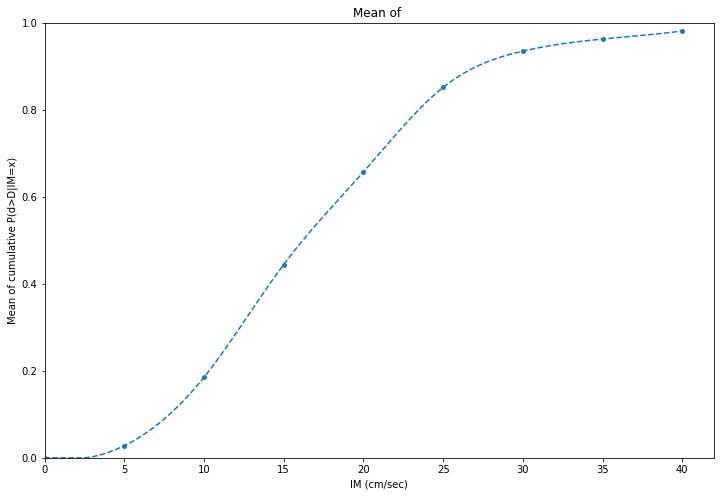

In [5]:
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(figsize=(12,8))
        # 100 points of x,    interpolation for the curve,                                                              clearing non-zeroes
ax.plot(np.linspace(0,40,100),make_interp_spline(np.arange(0,45,5),np.mean(NLTHA9_pivot,axis=0))(np.linspace(0,40,100)).clip(0),linestyle='--')
ax.scatter(np.arange(0,45,5),np.mean(NLTHA9_pivot,axis=0),s=15)
# do not forget to make the straight line between 0 and 5


ax.set_xlim(0)
ax.set_ylim(0,1)
ax.set_xlabel('IM (cm/sec)')
ax.set_ylabel('Mean of cumulative P(d>D|IM=x)')   ## Mean or median???????????????
ax.set_title('Mean of ') ### Title is not ready

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


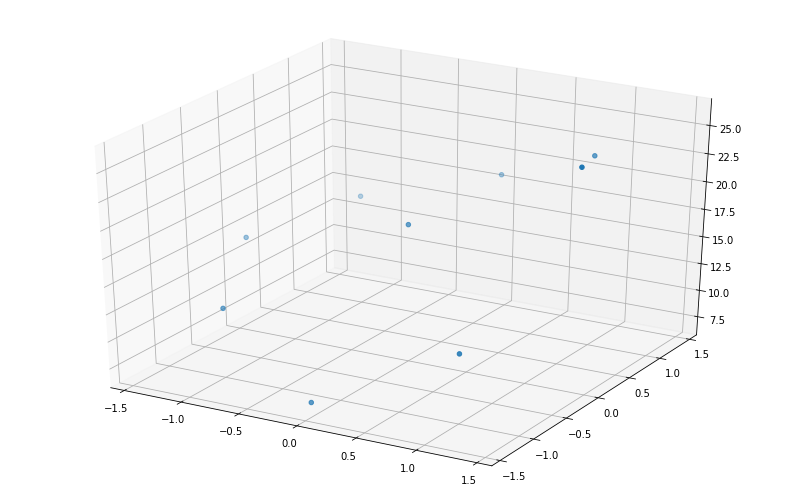

In [6]:

##pivot_numpy = np.concatenate((np.zeros(9)[:, np.newaxis], pivot_numpy), axis=1)
ecu_9_alpha_frag, Vult_9_alpha_frag = zip(*NLTHA9_pivot.index.values)
ecu_9_alpha_frag, Vult_9_alpha_frag = np.asarray(ecu_9_alpha_frag), np.asarray(Vult_9_alpha_frag)

result_9_list = []
theta_9_list = []
beta_9_list = []

IM = np.arange(0,45,5)
fragility_table = pd.DataFrame(columns = ['0','5','10','15','20','25','30','35','40'])
z_list = []

def frag(thetabeta):
    estimated_fragility = sp.norm.cdf(np.log(factor_list),np.log(thetabeta[0]),thetabeta[1])
    log_likelihood = np.log(sp.binom.pmf(pcllps*nrcrds,nrcrds,estimated_fragility))
    fun = -np.sum(log_likelihood)

    return fun

for i,ecu_i in enumerate(ecu_9_alpha_frag):
    factor_list = np.array([0,5,10,15,20,25,30,35,40])
    pcllps = NLTHA9_pivot.iloc[i]
    nrcrds = 12
    ncllps = pcllps*nrcrds

    # starting guess
    theta, beta = 24,0.4
    
    # Bounds
    bnds = ((4, 50), (0.2, 1))

    thetabeta_start = [theta,beta]
    
    result = spo.minimize(frag,thetabeta_start,options={'disp': True},bounds=bnds)

    if result.success:
        print("Success!", end = '\n')
        miny = result.x
        theta_mxlk = round(miny[0],2)
        beta_mxlk = round(miny[1],2)
        theta_9_list.append(theta_mxlk)
        beta_9_list.append(beta_mxlk)

        z_mxlk = -round(result.fun,2)
        z_list.append(z_mxlk)
        fragility_table.loc[i] = sp.norm.cdf(np.log(IM),np.log(theta_mxlk),beta_mxlk)

theta_9_list = np.array(theta_9_list)
beta_9_list = np.array(beta_9_list)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.scatter(ecu_9_alpha_frag, Vult_9_alpha_frag, theta_9_list)
fig.show()


This is the 3D plot of fragility outputs for 9 CCM combination of ecu and Vult metavariables

[ 0.          0.15026941  0.279746    0.03415156  0.09449024 -0.22978552]


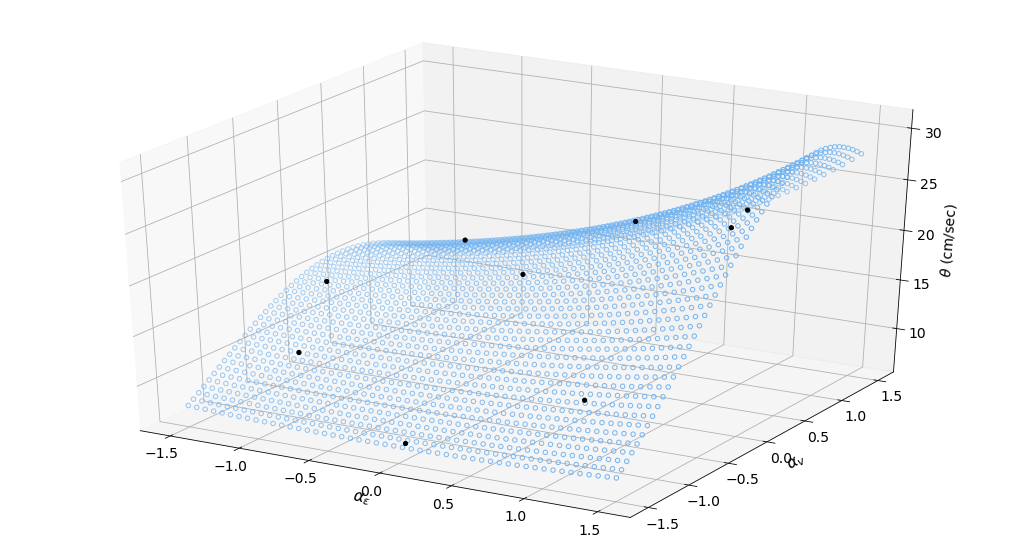

In [197]:
# -*- coding: utf-8 -*-

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_1,x_2 = map(list,zip(*NLTHA9_pivot.index.values))
x_values =np.column_stack((x_1,x_2))
y_values = np.log(theta_9_list)
poly_model = PolynomialFeatures(degree=2)
poly_x_values = poly_model.fit_transform(x_values)

# should be in the form [1, a, b, a^2, ab, b^2]
poly_model.fit(poly_x_values, y_values)
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)
print(regression_model.coef_)
#p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
MSE = mean_squared_error(y_values, y_pred, squared=False)


x1_mesh,x2_mesh = np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50)
x1_mesh, x2_mesh = np.meshgrid(x1_mesh, x2_mesh)
x_mesh = np.array([x1_mesh.flatten(), x2_mesh.flatten()]).T
poly_x_mesh = poly_model.fit_transform(x_mesh)
y_mesh = regression_model.predict(poly_x_mesh)

fig, ax = plt.subplots(figsize =(18,10), subplot_kw={'projection': '3d'})


ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)

ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=70)
ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


#ax.set_zlabel(r"$\theta$ (cm/sec)",fontsize=14)
#ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
#ax.set_ylabel(r"$\alpha_v$",fontsize=16)

#ax.scatter(x_values[:,0], x_values[:,1], np.exp(y_values),color='black',marker='.',alpha=1,s=70)
#ax.scatter(x1_mesh, x2_mesh, np.exp(y_mesh), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


### for 3rd degree





/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract



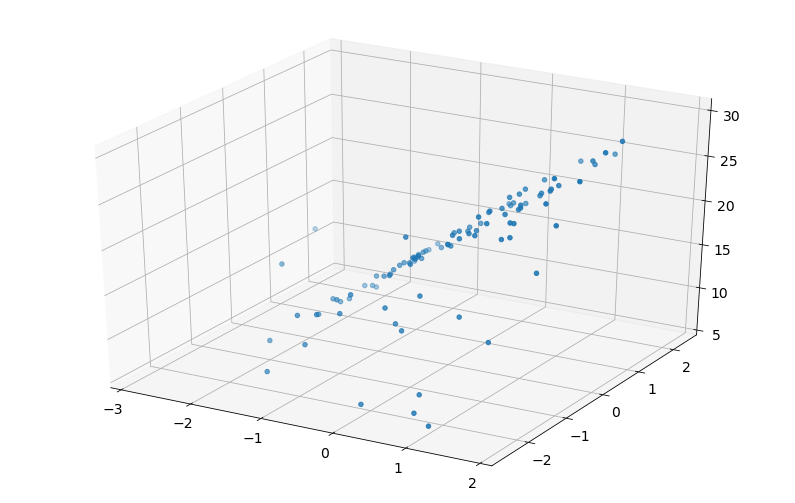

In [199]:
NLTHA100_pivot = pd.pivot_table(NLTHA100, values='state', index=['ecu_alpha','Vult_alpha'],columns=['IM'], aggfunc=np.sum)  #merging rows makes more problems so leave them as they are
NLTHA100_pivot.insert(0,0,0)
NLTHA100_pivot= NLTHA100_pivot/12

ecu_100_alpha_frag, Vult_100_alpha_frag = zip(*NLTHA100_pivot.index.values)
ecu_100_alpha_frag, Vult_100_alpha_frag = np.asarray(ecu_100_alpha_frag), np.asarray(Vult_100_alpha_frag)

result_100_list = pd.DataFrame(columns = ['ecu_100','Vult_100','theta_100','beta_100'])
theta_100_list = []
beta_100_list = []

IM = np.arange(0,45,5)
fragility_function = []
fragility_table = pd.DataFrame(columns = ['0','5','10','15','20','25','30','35','40'])
z_list = []

np.seterr(divide = 'ignore') 

def frag(thetabeta):
    estimated_fragility = sp.norm.cdf(np.log(factor_list),np.log(thetabeta[0]),thetabeta[1])
    log_likelihood = np.log(sp.binom.pmf(pcllps*nrcrds,nrcrds,estimated_fragility))
    fun = -np.sum(log_likelihood)

    return fun

for i,ecu_i in enumerate(ecu_100_alpha_frag):
    factor_list = np.array([0,5,10,15,20,25,30,35,40])
    pcllps = NLTHA100_pivot.iloc[i]
    nrcrds = 12
    ncllps = pcllps*nrcrds

    # starting guess
    theta, beta = 25,0.5
    
    # Bounds
    bnds = ((3, 50), (0.1, 1))

    thetabeta_start = [theta,beta]
    
    result = spo.minimize(frag,thetabeta_start,options={'disp': True},bounds=bnds)

    if result.success:
        #print("Success!", end = '\n')
        miny = result.x
        theta_mxlk = round(miny[0],2)
        beta_mxlk = round(miny[1],2)
        theta_100_list.append(theta_mxlk)
        beta_100_list.append(beta_mxlk)

        z_mxlk = -round(result.fun,2)
        z_list.append(z_mxlk)
        fragility_table.loc[i] = sp.norm.cdf(np.log(IM),np.log(theta_mxlk),beta_mxlk)

theta_100_list = np.array(theta_100_list)
beta_100_list = np.array(beta_100_list)

result_100_list['ecu_100']=ecu_100_alpha_frag
result_100_list['Vult_100']=Vult_100_alpha_frag
result_100_list['theta_100']=theta_100_list
result_100_list['beta_100']=beta_100_list

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.scatter(ecu_100_alpha_frag, Vult_100_alpha_frag, theta_100_list)
fig.show()

In [188]:
def mesh_maker(degree):
    poly_model = PolynomialFeatures(degree)
    poly_x_values = poly_model.fit_transform(x_values)
    # should be in the form [1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_values, y_values)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)

    y_pred = regression_model.predict(poly_x_values)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(y_values, y_pred, squared=False)
    poly_x_mesh = poly_model.fit_transform(x_mesh)
    y_mesh = regression_model.predict(poly_x_mesh)
    return y_mesh

fig = go.Figure()

fig.add_trace(
              go.Scatter3d(x=ecu_9_alpha_frag, y=Vult_9_alpha_frag, z=theta_9_list,mode='markers',marker_size=2.5,marker_color='black',opacity=0.7))

fig.add_trace(
              go.Scatter3d(x=ecu_100_alpha_frag, y=Vult_100_alpha_frag, z=theta_100_list,mode='markers',marker_size=1.5,marker_color='gray',opacity=0.7))

for dgr, clrscl in zip([2,3],["Viridis","emrld"]):
    fig.add_trace(                       
                  go.Scatter3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr)),mode='markers',marker_size=1,marker_color='silver',opacity=0.5,visible=False))

    fig.add_trace(
                  go.Mesh3d(x=x_mesh[:,0], y=x_mesh[:,1], z=np.exp(mesh_maker(dgr))
                            ,opacity=0.4, contour_show=True,
                            intensity=np.exp(mesh_maker(3)),
                            colorscale=clrscl,visible=False))


fig.update_layout(scene = dict(
                              xaxis_title=r"$\alpha_\epsilon$",
                              yaxis_title='alpha_Vult',
                              zaxis_title=r"$\theta$ (cm/sec)"),
                              width=800,
                              height=600,
                              legend=dict(itemclick=False),
                showlegend=False,
                autosize=False,
                margin=dict(t=40, b=0, l=0, r=0)
                )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Just points",
                     method="update",
                     args=[{"visible": [True,True,False, False, False, False]},
                           {"title": "No model",
                            "annotations": []}]),
                dict(label="2nd degree",
                     method="update",
                     args=[{"visible": [True,True,True, True, False, False]},
                           {"title": "2nd degree model",
                            "annotations": []}]),
                dict(label="3rd degree",
                     method="update",
                     args=[{"visible": [True,True,False, False, True, True]},
                           {"title": "3rd degree model",
                            "annotations":  []}]),
            ]),
        )
    ])

fig.show()

# Add dropdown



0.6370598663298618


0.43698575483149127




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



'\n## graphing residual plot\n\ntest_y_residual = (test_y_pred-test_y)\n\n\nfig = plt.figure(figsize =(14, 9))\nax = plt.axes(projection =\'3d\')\n\n\nax.set_xlabel(r"$\x07lpha_\\epsilon$",fontsize=16)\nax.set_ylabel(r"$\x07lpha_v$",fontsize=16)\nax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)\nax.set_zlim(-1,1)\n\nax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color=\'black\',marker=\'.\',alpha=1,s=70)\nax.scatter(test_x[:,0], test_x[:,1], test_y_residual/test_y,color=\'black\',marker=\'.\',alpha=0.25,s=70)\n'

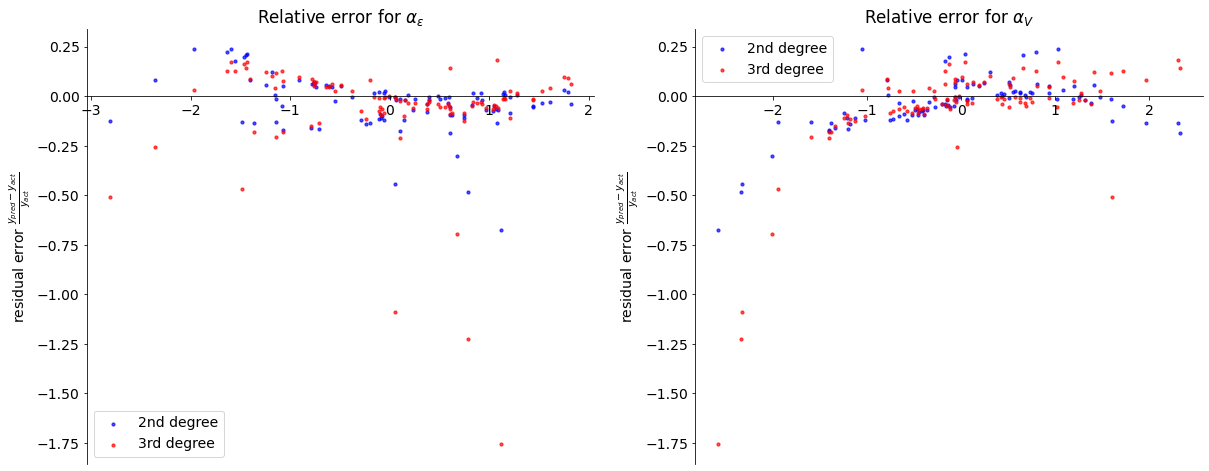

In [182]:


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


######## testing phase ################
'''
## cleaning data 

# Detection
# IQR
Q1 = np.percentile(result_100_list[['theta_100']], 16,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(result_100_list[['theta_100']], 84,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
  
# Upper bound
upper = np.where(result_100_list[['theta_100']] >= (Q3+1.5*IQR))[0]
# Lower bound
lower = np.where(result_100_list[['theta_100']] <= (Q1-1.5*IQR))[0]
 
# Removing the Outliers 
result_100_cleaned = pd.DataFrame(result_100_list)

result_100_cleaned[['theta_100']].drop(upper[0], inplace = True)
result_100_cleaned[['theta_100']].drop(lower[0], inplace = True)
'''
## preparing data

fig,ax = plt.subplots(1,2,figsize=(20,8))
for i,clr,dgr in zip(['2nd degree','3rd degree'],['blue','red'],[2,3]):
    poly_model = PolynomialFeatures(degree=dgr)
    poly_x_values = poly_model.fit_transform(x_values)
    # should be in the form [1, a, b, a^2, ab, b^2]
    poly_model.fit(poly_x_values, y_values)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)
    #p00,p10,p01,p20,p11,p02 = regression_model.coef_.T
    MSE = mean_squared_error(y_values, y_pred, squared=False)
 
    
    test_x = np.column_stack(map(list,zip(*NLTHA100_pivot.index.values)))
    test_y = np.log(theta_100_list)
    test_poly_x =  poly_model.fit_transform(test_x)
    test_y_pred = regression_model.predict(test_poly_x)
    r2 = r2_score(np.exp(test_y), np.exp(test_y_pred))
    test_y_residual = (test_y_pred-test_y)/test_y

    print(r2)
    ax[0].scatter(test_x[:,0],test_y_residual,color=clr,s=10,label=i,alpha=0.7)
    ax[0].spines['bottom'].set_position('zero')
    ax[0].spines['right'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[0].set_title(r"Relative error for $\alpha_\epsilon$")
    ax[0].set_ylabel(r"residual error $\frac{y_{pred}-y_{act}}{y_{act}}$")
    ax[0].legend()

    ax[1].scatter(test_x[:,1],test_y_residual,color=clr,s=10,label=i,alpha=0.7)
    ax[1].spines['bottom'].set_position('zero')
    ax[1].spines['right'].set_color('none')
    ax[1].spines['top'].set_color('none')
    ax[1].set_title(r"Relative error for $\alpha_V$")
    ax[1].set_ylabel(r"residual error $\frac{y_{pred}-y_{act}}{y_{act}}$")
    ax[1].legend()


    print('\n')
'''
## graphing residual plot

test_y_residual = (test_y_pred-test_y)


fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')


ax.set_xlabel(r"$\alpha_\epsilon$",fontsize=16)
ax.set_ylabel(r"$\alpha_v$",fontsize=16)
ax.set_zlabel(r"$\theta$ residual (cm/sec)",fontsize=14)
ax.set_zlim(-1,1)

ax.scatter(x_values[:,0], x_values[:,1], (y_pred-y_values)/y_values,color='black',marker='.',alpha=1,s=70)
ax.scatter(test_x[:,0], test_x[:,1], test_y_residual/test_y,color='black',marker='.',alpha=0.25,s=70)
'''

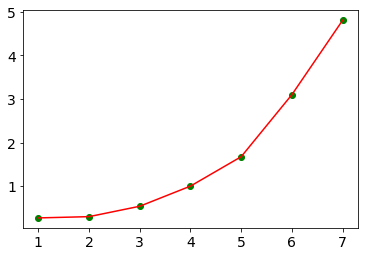

In [183]:

# -*- coding: utf-8 -*-


number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   test_poly_x =  poly_model.fit_transform(test_x)
   test_y_pred = regression_model.predict(test_poly_x)
   
   plt_mean_squared_error.append(mean_squared_error(test_y, test_y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 


Model made from 100 simulations